In [1]:
# Numerical libs
import numpy as np
import pandas as pd

# ML libs
from  sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score
# Plotting libs
import matplotlib.pyplot as plt
import seaborn as sns
# Utils
from tqdm.notebook import tqdm

## Utils

## Load data

In [2]:
data = load_breast_cancer(as_frame=True)
X, y = data['data'], data['target']
df = pd.concat([X, y], axis = 1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Let's get the missing values / feature
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# Data split

In practice we gather some datapoints $(x, y)$. 
- $x \in \mathbb{R}^d$ is the feature vector
- $y$ is the class. Today $y$ will take binary values

We want to find a model $h$ that trains on our data and makes predictions. We want to evaluate this model too. Therefore we need to split our dataset into a **training, validation and testing** dataset.

**What is evaluation?**
- Looking at how the model performs based on different *metrics*
    - Accuracy, confusion matrices etc
    - We will look at them a bit later today

**Training dataset**
- The model will be trained on this dataset. 
- We can evaluate the model on this dataset in order to see if it **learns something**

**Validation dataset**
- The model will **not** be trained on this dataset. 
- We will evaluate the model on this dataset in order to see if it **generalizes** to samples it hasn't seen before
- After evaluation we will fine tune by hand our model (change some hyperparameters)
    - Human input

**Testing dataset**
- The model will **not** be trained on this dataset. 
- We will evaluate the model on this dataset in order to see how it would perform **in the wild**
- This is the final challenge
    - No human input

**Careful about**
- Data representativeness $\to$ the data splits should have the same proportions of classes. 
    - Ex: If trainset has 60% class 1 and 40% class 2 the validation set shouldn't have 20% class 1 and 80% class 2
- Time: Careful if you split by time
- Duplicate data

## Hold-out

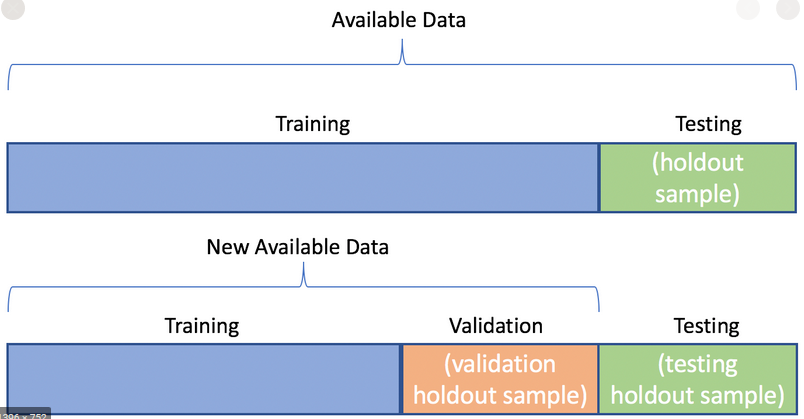

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X, y = df.drop("target", axis = 1), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [6]:
X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

In [7]:
model = MLPClassifier(hidden_layer_sizes=[32, ], batch_size=32, random_state=42)
epochs = 200

history = {}
history["train_acc"] = []
history["val_acc"] = []
classes = np.unique(y)
for epoch in tqdm(range(epochs)):
    model.partial_fit(X_train, y_train, classes)
    history["train_acc"].append(accuracy_score(model.predict(X_train), y_train))
    history["val_acc"].append(accuracy_score(model.predict(X_val), y_val))



  0%|          | 0/200 [00:00<?, ?it/s]

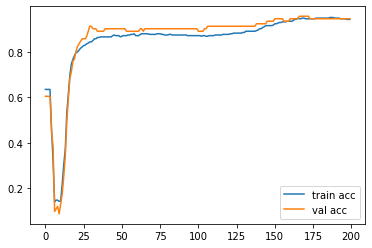

In [8]:
plt.plot(history['train_acc'], label = "train acc")
plt.plot(history['val_acc'], label = "val acc")

plt.legend()
plt.show()

In [9]:
preds_test = model.predict(X_test)
accuracy_score(preds_test, y_test)

0.9649122807017544

In [10]:
def train(model, train_data, val_data, epochs):
    X_train, y_train = train_data
    X_val, y_val = val_data
    
    history = {}
    history["train_acc"] = []
    history["val_acc"] = []
    classes = np.unique(y_train)
    for epoch in tqdm(range(epochs)):
        model.partial_fit(X_train, y_train, classes)
        history["train_acc"].append(accuracy_score(model.predict(X_train), y_train))
        history["val_acc"].append(accuracy_score(model.predict(X_val), y_val))
    return history

## Cross validation

*When?*
- Little data available
- $+$ Better evaluation
- $-$ Expensive

https://scikit-learn.org/stable/modules/cross_validation.html

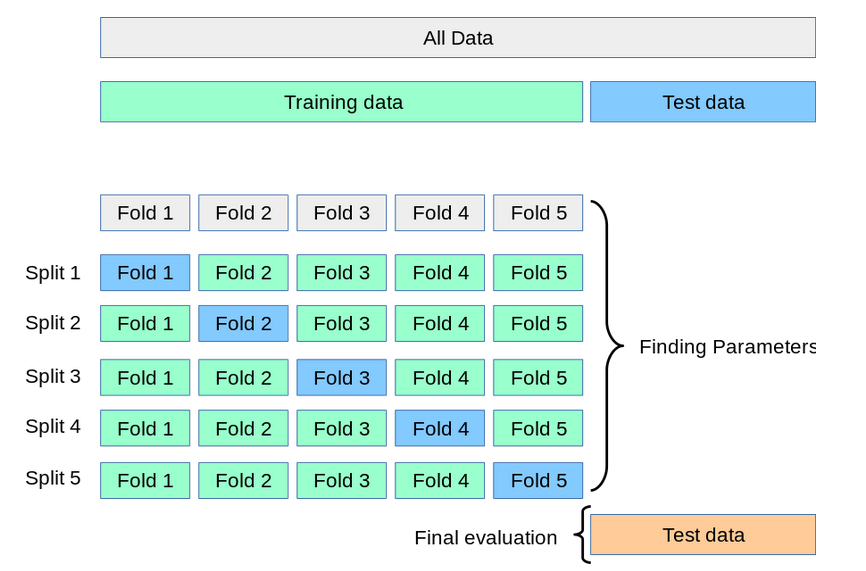

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
model = MLPClassifier(hidden_layer_sizes=[32, ], batch_size=32, random_state=42)

In [13]:
scores = cross_val_score(model, X, y, cv = 10)

In [14]:
scores.mean(), scores.std()

(0.9315162907268169, 0.03271138781826449)

# Overfit, Underfit

*Insert explanation*
- Complicated models
- More training

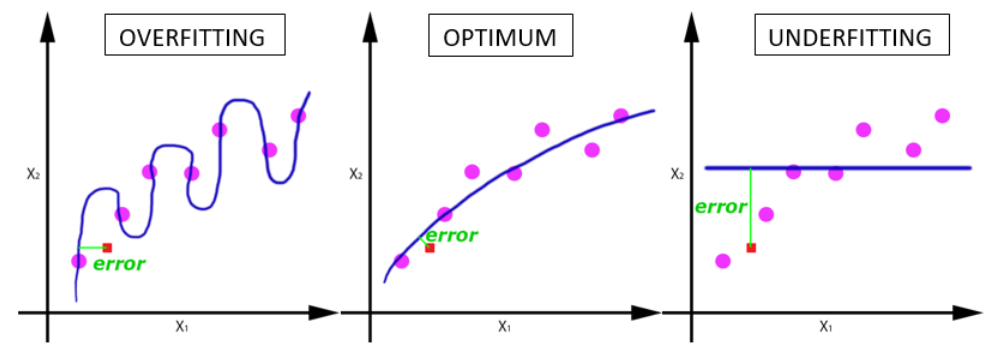
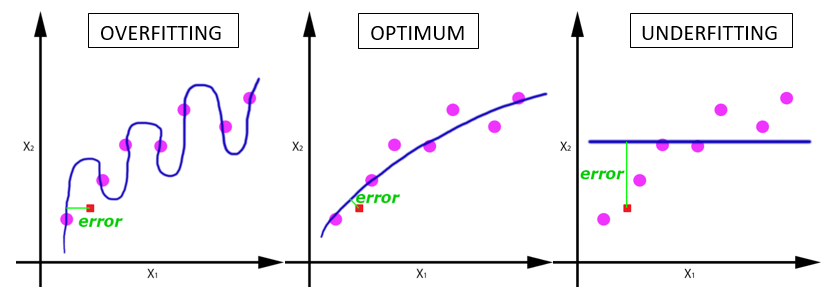

In [15]:
X, y = df.drop("target", axis = 1), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [16]:
# Training for too long

model = MLPClassifier(hidden_layer_sizes=[32,], batch_size=32, random_state=42)
epochs = 100
history = train(model, (X_train, y_train), (X_val, y_val), epochs)

  0%|          | 0/100 [00:00<?, ?it/s]

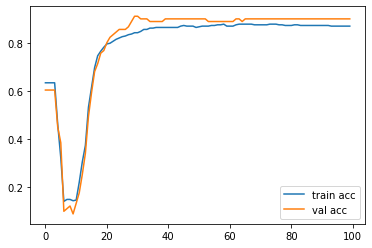

In [17]:
plt.plot(history['train_acc'], label = "train acc")
plt.plot(history['val_acc'], label = "val acc")
plt.legend()
plt.show()

In [18]:
preds_test = model.predict(X_test)
accuracy_score(preds_test, y_test)

0.9210526315789473

In [19]:
# Over complicated model

model = MLPClassifier(hidden_layer_sizes=[512, 512], batch_size=32, random_state=42)
epochs = 100

history = train(model, (X_train, y_train), (X_val, y_val), epochs)

  0%|          | 0/100 [00:00<?, ?it/s]

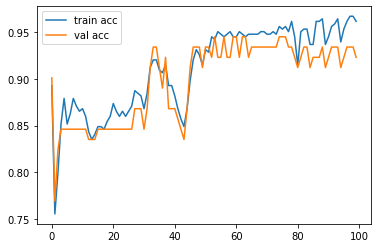

In [20]:
plt.plot(history['train_acc'], label = "train acc")
plt.plot(history['val_acc'], label = "val acc")
plt.legend()
plt.show()

In [21]:
preds_test = model.predict(X_test)
accuracy_score(preds_test, y_test)

0.9473684210526315